In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [12]:
equation = r"W(t) = W(0) + \sum_{i=1}^{n} Z_i \cdot (t_i - t_{i-1})^{\frac{1}{2}}"
display(Math(equation))

<IPython.core.display.Math object>

In [19]:
def brownian_motion(X_0, T, N, n, with_mean=True):
    """This function simulate standard brownian motion.

    @Params:
    --------
    X_0: int drift from whare brownian motion start.
    T: int to generate times interval.
    N: int number of instance. 
    n: int number of trajectory simulated.
    with_mean: bool either to calculate mean process or not.


    --------
    return t_axes: nd.array, Bt: nd.array, Bt_mean: nd.array
    """
    Bt = np.full((N, n), X_0,dtype=float)  # Initialize brownian matrix with size (N, n) value X_0
    normal_dist = np.random.standard_normal((N, n))

    dt = T / N
    t_axes = np.linspace(0, T, N)
    for i in range(1, N):
        Bt[i] = Bt[i - 1] + np.sqrt(dt) * normal_dist[i - 1]

    if with_mean:
        Bt_mean = np.mean(Bt, 1).reshape(N, 1)
        return t_axes, Bt, Bt_mean
    else: 
        return t_axes, Bt
    



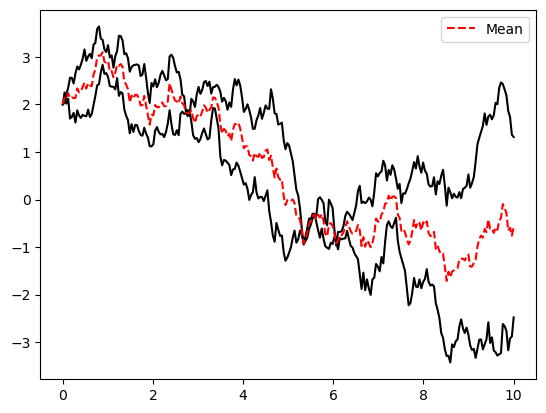

In [24]:
t_axes, Bt,Bt_mean = brownian_motion(2, 10, 250, 2)
plt.plot(t_axes,Bt,color='black')
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

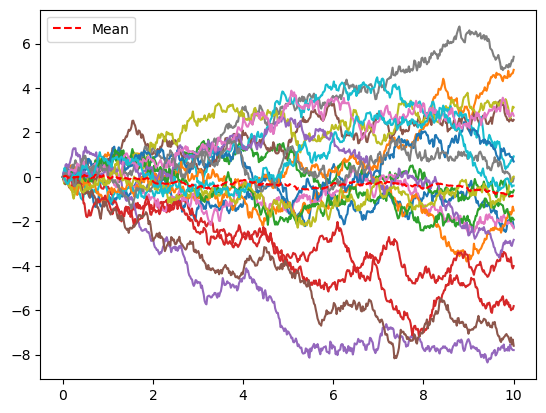

In [21]:
t_axes, Bt,Bt_mean = brownian_motion(0, 10, 500, 20)
plt.plot(t_axes,Bt)
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

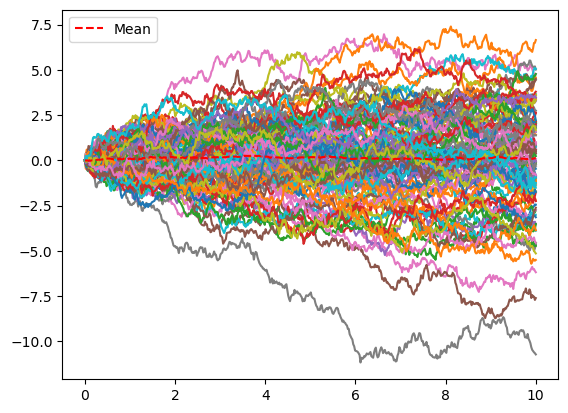

In [22]:
t_axes, Bt,Bt_mean = brownian_motion(0, 10, 500, 100)
plt.plot(t_axes,Bt)
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

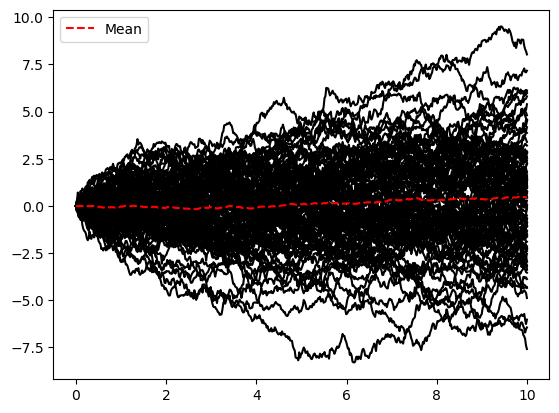

In [25]:
t_axes, Bt,Bt_mean = brownian_motion(0, 10, 500, 100)
plt.plot(t_axes,Bt,color='black')
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()